! = means that i did not fullly undrstand the concept

1- data exploration

In [28]:
# import modules
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder 

In [29]:
# read csv file
df = pd.read_csv('train.csv')
df
# note : you can use .head(default:5) or .tail(default:5) to see the first or last 5 rows of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [39]:
df['Age'].values[:]
# => this will return a 2D array

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

In [31]:
#number of rows and columns
df.shape

(891, 12)

In [32]:
# filtering null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
# info of the dataframe using .info()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
# describe of the dataframe using .describe() (with the include='all' include the non-numeric columns)
df.describe(include='all')
# .describe() = numeric values / .info() = all values overview

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [35]:
#  you can access the datfarme's colums and indexes with .columns and .index

In [36]:
# Std = Standard variation represents the average distance between each data point and the mean of the dat a. It is a key metric used in 
# statistical analysis to understand the distribution of data and to identify outliers. 25% = Q1 and 50% = Q2 and 75% = Q3 
# => quartile seperates the data into quartiles.

In [37]:
# std 
df.std()

TypeError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [ ]:
# selecting with loc or iloc : df['row',['column1','column2']]

#slicing :
# :: step over 
# :-1 reverse order 
# " : "  => all rows or columns

# select : df[ df['Age']>70 ] => select all rows where the age is greater than 70
# just put inside the brackets the condition you want to apply

2- Data Preprocessing

In [ ]:
# check if there is any duplicated rows
df.duplicated().sum() 
# to remove the duplicated rows : df.drop_duplicates(inplace=True)


In [ ]:
# is there any missing values ? :
# df.isnull().any()
df.isnull().sum()


In [ ]:
# drop rows with missing values
# df.dropna(axis=0,inplace=True) => comes with data loss
# drop any ro< that contains nan value in embarked column
# df.dropna(subset=['Embarked'],inplace=True)
# deleting data is the last option 


In [ ]:
# show the null rows in embarked column
df[df['Embarked'].isnull()]

# show the most common value in embarked column
a = df['Embarked'].mode()

# fill the missing values with the mode of the Embarked column
df['Embarked'].fillna(a[0],inplace=True)


In [ ]:
# replace the missing values in the Age column with the mean of the Age column

df['Age'].isnull().sum()
a = int(df['Age'].mean())
df['Age'].fillna(a,inplace=True)

In [ ]:
# check if there is any missing values left
df.isnull().sum()

In [ ]:
# replace the missing values in the Cabin column with diffrent cabin numbers that are not in the dataset and then replace the letter with a number in order



In [ ]:
# replace the missing values in the Cabin column with 'No cabin'
df['Cabin'].fillna('No cabin',inplace=True)


In [ ]:
#info of the dataframe using .info()
df.info()

In [ ]:
# change the type of the Embarked column to int to allow the model to work on integers

df['Embarked'].unique()
embarked_replacement = {'S':1,'C':2,'Q':3}
df['Embarked'].replace(embarked_replacement)


In [ ]:
# change Sex column to int

Sex_replacement = {'male': 1, 'female': 2}
df['Sex'].replace(Sex_replacement,inplace=True)
df['Sex']



In [ ]:
# fit_transform => transforl data to numbers and train the model to be able to predict the numbers
# encoding diffrent values in the Cabin column to numbers and stores them in the object 'encoder'
le = LabelEncoder()
df['Cabin'] = le.fit_transform(df['Cabin'])
len(df['Cabin'].unique())
# use len() to get the size instead of visually identifying it

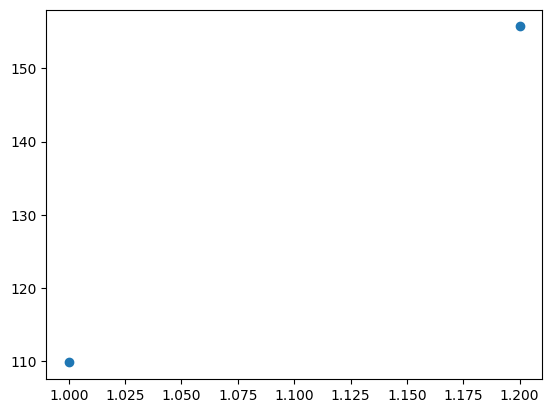